# Analysis after cleaning

After the cleaning phase, an analysis will be conducted to evaluate how the dataset was affected

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("cleaned_data.csv")

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 96025 rows and 31 columns


After the cleaning phase, the dataset was reduced from 132,382 to 96,025 rows, and from 37 to 31 columns.

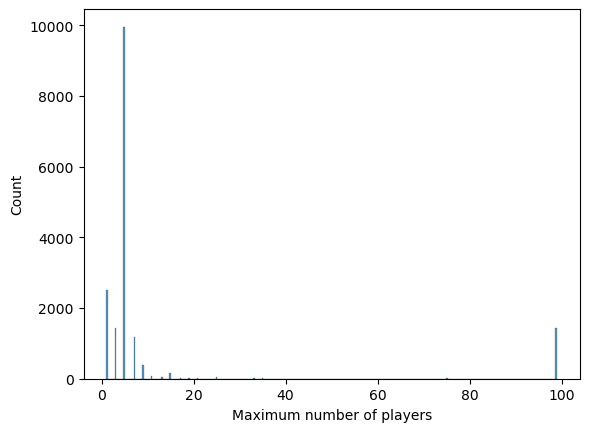

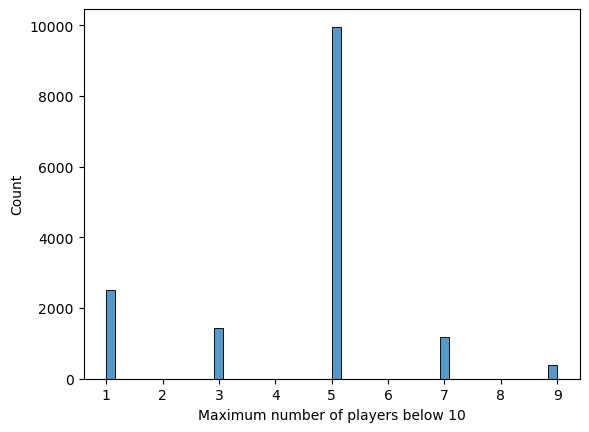

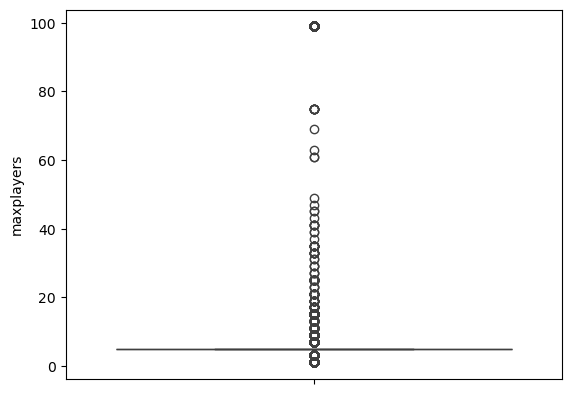

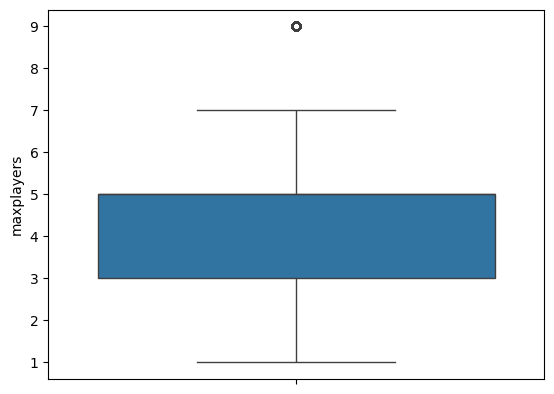

The game with the biggest maximum amount of players has 99 players


In [7]:
max_players_non_null = df.loc[df["maxplayers"].notna() & df["maxplayers"] != 0]
max_players_below_100 = max_players_non_null.loc[max_players_non_null["maxplayers"] < 100]
max_players_below_10 = max_players_non_null.loc[max_players_non_null["maxplayers"] < 10]

sb.histplot(max_players_non_null, x = "maxplayers")
plt.xlabel("Maximum number of players")
plt.ylabel("Count")
plt.show()

sb.histplot(max_players_below_10, x = "maxplayers")
plt.xlabel("Maximum number of players below 10")
plt.ylabel("Count")
plt.show()
sb.boxplot(max_players_non_null, y = "maxplayers")
plt.show()


sb.boxplot(max_players_below_10, y = "maxplayers")
plt.show()

print(f'The game with the biggest maximum amount of players has {max(max_players_non_null["maxplayers"])} players')

The column 'yearpublished' has 0 missing values.
The column 'yearpublished' has 0 values after 2025. This means these games were not released for now.


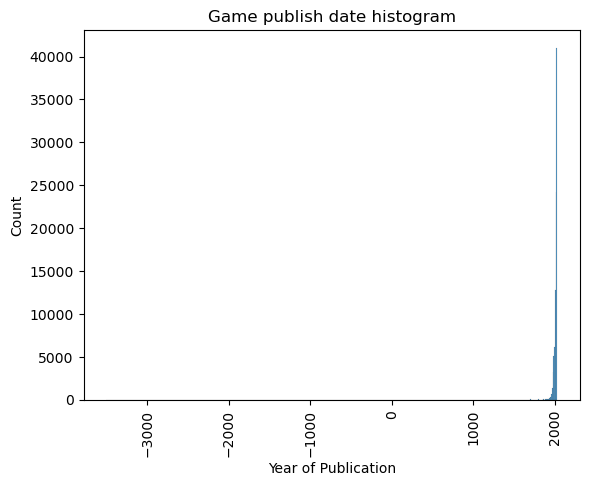

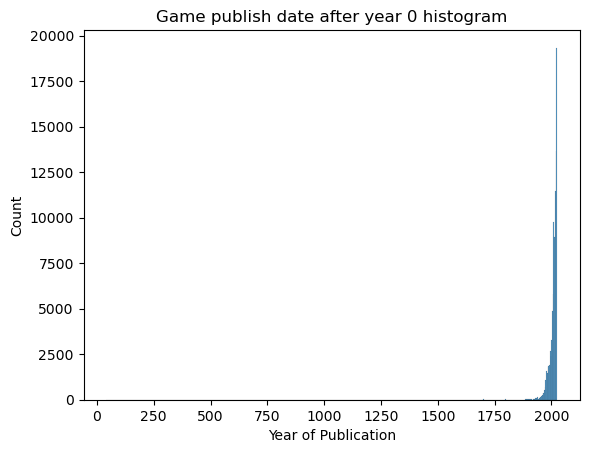

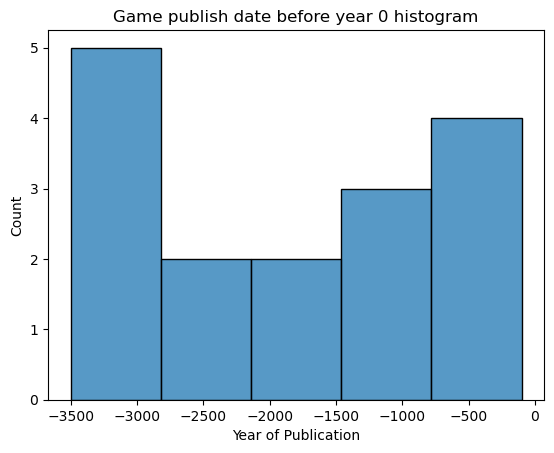

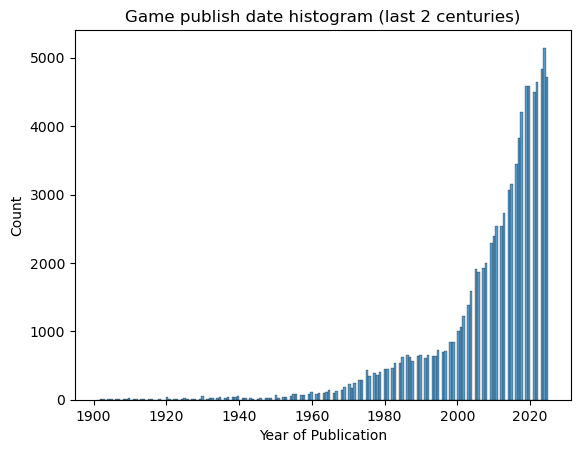

In [8]:
print(f'The column \'yearpublished\' has {df[df["yearpublished"].isna()].shape[0] + df[df["yearpublished"] == 0].shape[0]} missing values.')
print(f'The column \'yearpublished\' has {df[df["yearpublished"] > 2025].shape[0]} values after 2025. This means these games were not released for now.')
non_null_years_pub = df.loc[(df["yearpublished"].notna()) & (df["yearpublished"] != 0)]
sb.histplot(non_null_years_pub, x = "yearpublished")

plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram")
plt.xticks(rotation = 90)
plt.show()

positive_years_pub = non_null_years_pub.loc[df["yearpublished"] > 0]
negative_years_pub = non_null_years_pub.loc[df["yearpublished"] < 0]
recent_releases = non_null_years_pub.loc[df["yearpublished"] > 1900]
sb.histplot(positive_years_pub, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date after year 0 histogram")
plt.show()
sb.histplot(negative_years_pub, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date before year 0 histogram")
plt.show()
sb.histplot(recent_releases, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram (last 2 centuries)")
plt.show()


In [9]:
invalid_description = df.loc[df["description"].isna() | (df["description"].str.strip() == "")]
print(f'There are {invalid_description.shape[0]} null descriptions')

There are 0 null descriptions


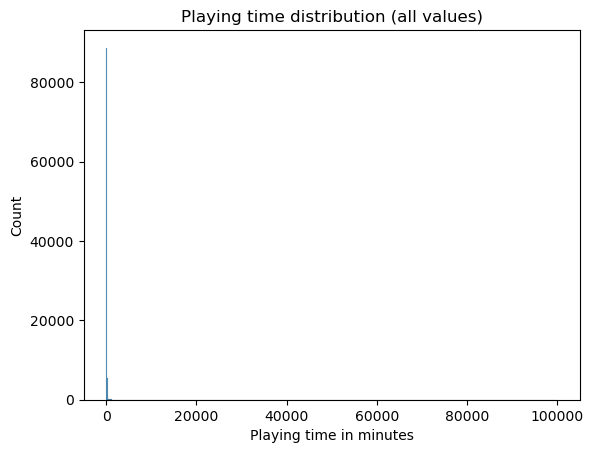

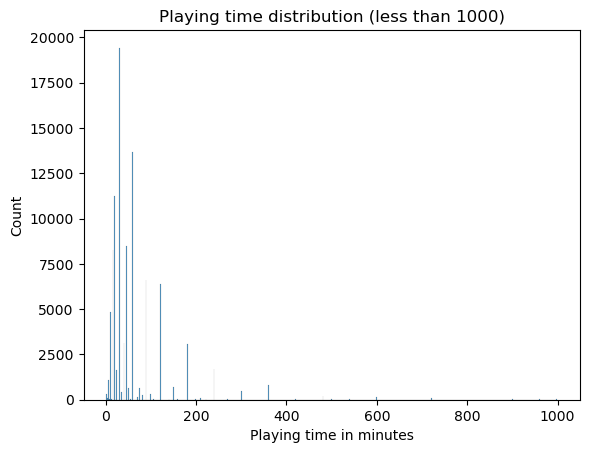

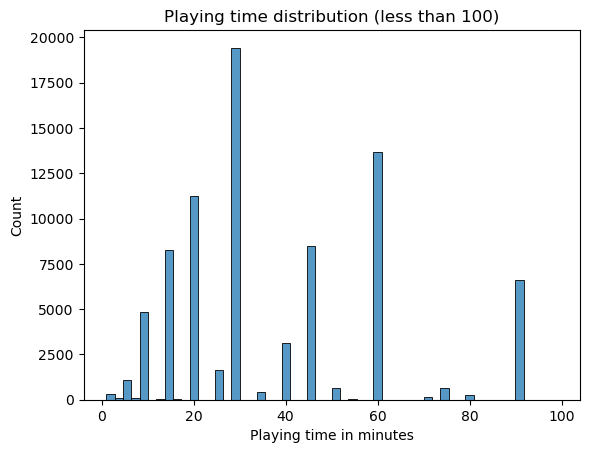

Maximum playing time is 100000
There are 0 null playing times
There are 262 extreme playing times (more than 1000 minutes)


In [10]:
null_playingtime = df[(df["playingtime"] == 0) | (df["playingtime"].isna())]
non_null_playingtime = df.loc[(df["playingtime"] != 0) & df["playingtime"].notna()]
less_than_1000_playingtime = non_null_playingtime.loc[non_null_playingtime["playingtime"] < 1000]
less_than_100_playingtime = non_null_playingtime.loc[non_null_playingtime["playingtime"] < 100]

sb.histplot(non_null_playingtime, x = "playingtime")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (all values)")
plt.show()

sb.histplot(less_than_1000_playingtime, x = "playingtime")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 1000)")
plt.show()

sb.histplot(less_than_100_playingtime, x = "playingtime")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 100)")
plt.show()


print(f'Maximum playing time is {max(df["playingtime"])}')
print(f'There are {null_playingtime.shape[0]} null playing times')
print(f'There are {non_null_playingtime.loc[non_null_playingtime["playingtime"] > 1000].shape[0]} extreme playing times (more than 1000 minutes)')

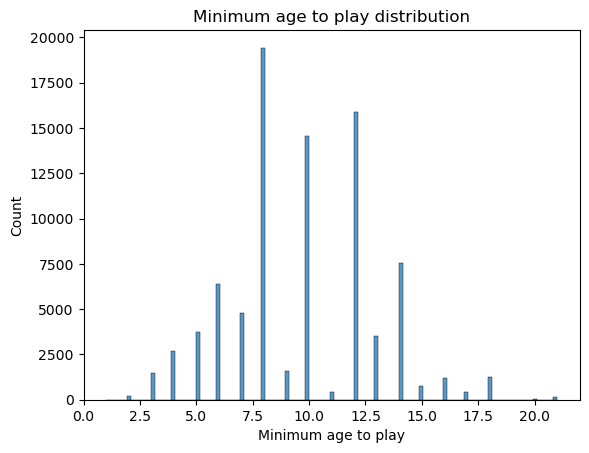

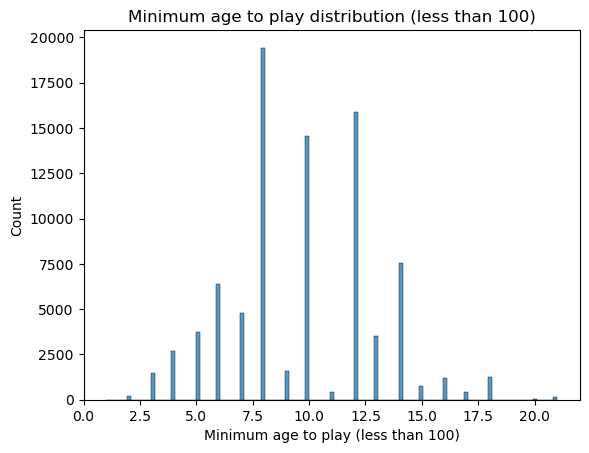

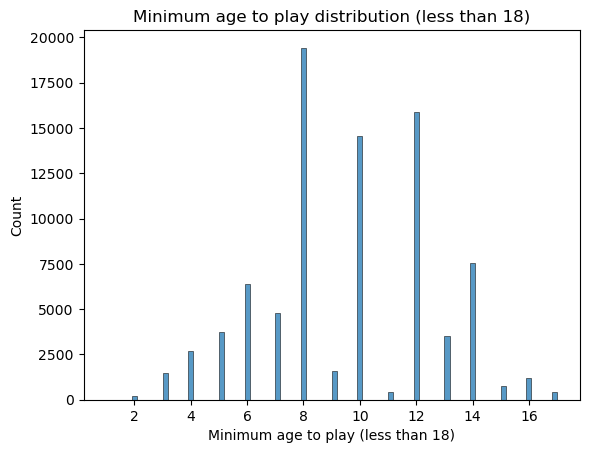

Maximum minimum age to play is 21
There are 10166 null minimum ages to play
There are 0 extreme minimum ages to play (more than 100 years old)


In [12]:
# Next we will analyze the minage column refering to the lowest age allowed for someone to play that boardgame.

null_minage = df[(df["minage"] == 0) | (df["minage"].isna())]
non_null_minage = df.loc[(df["minage"] != 0) & df["minage"].notna()]
less_than_100_minage = non_null_minage.loc[non_null_minage["minage"] < 100]
less_than_18_minage = non_null_minage.loc[non_null_minage["minage"] < 18]
sb.histplot(non_null_minage, x = "minage")
plt.xlabel("Minimum age to play")
plt.ylabel("Count")
plt.title("Minimum age to play distribution")
plt.show()

sb.histplot(less_than_100_minage, x = "minage")
plt.xlabel("Minimum age to play (less than 100)")
plt.ylabel("Count")
plt.title("Minimum age to play distribution (less than 100)")
plt.show()

sb.histplot(less_than_18_minage, x = "minage")
plt.xlabel("Minimum age to play (less than 18)")
plt.ylabel("Count")
plt.title("Minimum age to play distribution (less than 18)")
plt.show()

print(f'Maximum minimum age to play is {max(df["minage"])}')
print(f'There are {null_minage.shape[0]} null minimum ages to play')
print(f'There are {non_null_minage.loc[non_null_minage["minage"] > 100].shape[0]} extreme minimum ages to play (more than 100 years old)')


In [13]:
null_publishers = df[df["publishers"].isna() | (df["publishers"].str.strip() == "")]
print(f'There are {null_publishers.shape[0]} null publishers')
print(f'There are {df["publishers"].nunique()} unique publishers')
print(f'The publisher with the most games is {df["publishers"].value_counts().idxmax()} with {df["publishers"].value_counts().max()} games')

There are 0 null publishers
There are 33925 unique publishers
The publisher with the most games is (Self-Published) with 6705 games


In [14]:
print(f'The column \'categories\' has {df[df["categories"].isna() | (df["categories"].str.strip() == "")].shape[0]} missing values.')

The column 'categories' has 0 missing values.
